## 1. The Coin-Flipping Experiment

In [15]:
import numpy as np

def coin_em(rolls, theta_A=None, theta_B=None, maxiter=10):
    # Initial Guess
    theta_A = theta_A or random.random()
    theta_B = theta_B or random.random()
    thetas = [(theta_A, theta_B)]
    # Iterate
    for c in range(maxiter):
        print("#%d:\t%0.2f %0.2f" % (c, theta_A, theta_B))
        heads_A, tails_A, heads_B, tails_B = e_step(rolls, theta_A, theta_B)
        theta_A, theta_B = m_step(heads_A, tails_A, heads_B, tails_B)
        
    thetas.append((theta_A,theta_B))    
    return thetas, (theta_A,theta_B)

def e_step(rolls, theta_A, theta_B):
    """Produce the expected value for heads_A, tails_A, heads_B, tails_B 
    over the rolls given the coin biases"""
    
    heads_A, tails_A = 0,0
    heads_B, tails_B = 0,0
    for trial in rolls:
        likelihood_A = coin_likelihood(trial, theta_A)
        likelihood_B = coin_likelihood(trial, theta_B)
        p_A = likelihood_A / (likelihood_A + likelihood_B)
        p_B = likelihood_B / (likelihood_A + likelihood_B)
        heads_A += p_A * trial.count("H")
        tails_A += p_A * trial.count("T")
        heads_B += p_B * trial.count("H")
        tails_B += p_B * trial.count("T") 
    return heads_A, tails_A, heads_B, tails_B

def m_step(heads_A, tails_A, heads_B, tails_B):
    """Produce the values for theta that maximize the expected number of heads/tails"""

    # Replace dummy values with your implementation
    theta_A = heads_A / (heads_A + tails_A)
    theta_B = heads_B / (heads_B + tails_B)
    return theta_A, theta_B

def coin_likelihood(roll, bias):
    # P(X | Z, theta)
    numHeads = roll.count("H")
    flips = len(roll)
    return pow(bias, numHeads) * pow(1-bias, flips-numHeads)

In [16]:
rolls = [ "HTTTHHTHTH", "HHHHTHHHHH", "HTHHHHHTHH", 
          "HTHTTTHHTT", "THHHTHHHTH" ]
thetas, _ = coin_em(rolls, 0.6, 0.5, maxiter=6)

#0:	0.60 0.50
#1:	0.71 0.58
#2:	0.75 0.57
#3:	0.77 0.55
#4:	0.78 0.53
#5:	0.79 0.53


In [17]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib as mpl


def plot_coin_likelihood(rolls, thetas=None):
    # grid
    xvals = np.linspace(0.01,0.99,100)
    yvals = np.linspace(0.01,0.99,100)
    X,Y = np.meshgrid(xvals, yvals)
    
    # compute likelihood
    Z = []
    for i,r in enumerate(X):
        z = []
        for j,c in enumerate(r):
            z.append(coin_marginal_likelihood(rolls,c,Y[i][j]))
        Z.append(z)
    
    # plot
    plt.figure(figsize=(10,8))
    C = plt.contour(X,Y,Z,150)
    cbar = plt.colorbar(C)
    plt.title(r"Likelihood $\log p(\mathcal{X}|\theta_A,\theta_B)$", fontsize=20)
    plt.xlabel(r"$\theta_A$", fontsize=20)
    plt.ylabel(r"$\theta_B$", fontsize=20)
    
    # plot thetas
    if thetas is not None:
        thetas = np.array(thetas)
        plt.plot(thetas[:,0], thetas[:,1], '-k', lw=2.0)
        plt.plot(thetas[:,0], thetas[:,1], 'ok', ms=5.0)
        

def coin_marginal_likelihood(rolls, biasA, biasB):
    # P(X | theta)
    trials = []
    for roll in rolls:
        h = roll.count("H")
        t = roll.count("T")
        likelihoodA = coin_likelihood(roll, biasA)
        likelihoodB = coin_likelihood(roll, biasB)
        trials.append(np.log(0.5 * (likelihoodA + likelihoodB)))
    return sum(trials)

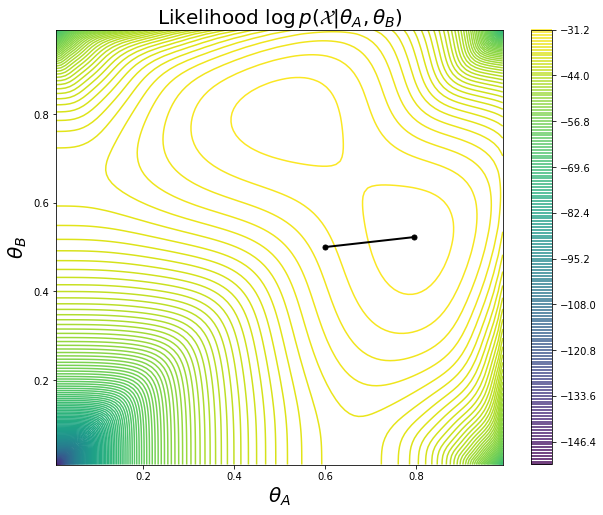

In [18]:
plot_coin_likelihood(rolls, thetas)

In [19]:
thetas2, _ = coin_em(rolls, 0.1, 0.3, maxiter=6)

#0:	0.10 0.30
#1:	0.43 0.66
#2:	0.50 0.75
#3:	0.51 0.78
#4:	0.52 0.79
#5:	0.52 0.79


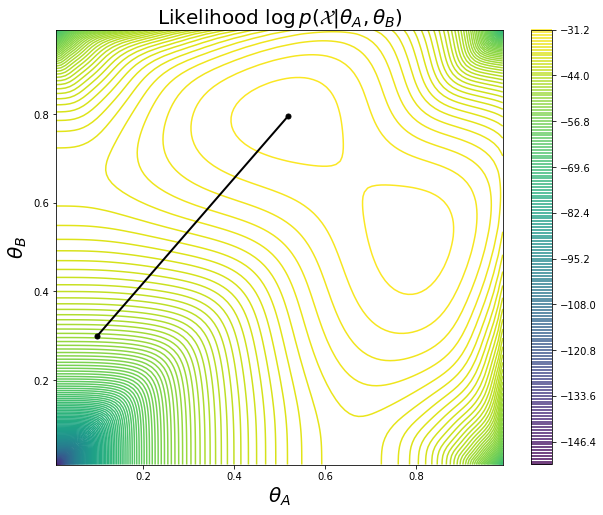

In [20]:
plot_coin_likelihood(rolls, thetas2)


#### ABOVE IS A REFERENCE

In [12]:
# Coin a is more likely to come up with heads than coin b.
import random
coin_a = 0.7
coin_b = 0.6
coin_a_result = []
coin_b_result = []
for x in range(100):
    random_a = random.random()
    random_b = random.random()
    if random_a < coin_a:
        coin_a_result.append('H')
    else:
        coin_a_result.append('T')
    if random_b < coin_b:
        coin_b_result.append('H')
    else:
        coin_b_result.append('T')


In [13]:
print(coin_a_result)
print(coin_b_result)

['T', 'H', 'H', 'H', 'T', 'T', 'H', 'T', 'H', 'H', 'T', 'H', 'H', 'T', 'H', 'T', 'H', 'H', 'H', 'H', 'H', 'H', 'T', 'T', 'H', 'H', 'H', 'H', 'H', 'T', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'T', 'H', 'H', 'H', 'H', 'H', 'T', 'T', 'T', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'T', 'H', 'H', 'H', 'H', 'H', 'T', 'H', 'H', 'H', 'H', 'T', 'T', 'T', 'T', 'H', 'H', 'H', 'T', 'T', 'H', 'T', 'T', 'H', 'H', 'H', 'T', 'H', 'H', 'T', 'H', 'H', 'H', 'T', 'H', 'H', 'H', 'T', 'H', 'H', 'T', 'H', 'H', 'H']
['H', 'H', 'T', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'T', 'T', 'H', 'T', 'H', 'H', 'T', 'T', 'H', 'H', 'T', 'H', 'T', 'H', 'T', 'H', 'H', 'H', 'T', 'T', 'T', 'H', 'H', 'T', 'T', 'H', 'H', 'T', 'T', 'H', 'H', 'H', 'T', 'H', 'T', 'H', 'H', 'H', 'T', 'T', 'H', 'H', 'H', 'T', 'T', 'T', 'T', 'H', 'H', 'H', 'H', 'T', 'H', 'H', 'T', 'H', 'H', 'H', 'T', 'T', 'T', 'H', 'T', 'H', 'H', 'H', 'T', 'T', 'H', 'T', 'H', 'T', 'H', 'H', 'H', 'T', 'T', 'H', 'T', 'T', 'H', 'T', 'H', 'H'

In [14]:
number_of_throws = 100
aH = 0
bH = 0
for x in range(number_of_throws):
    if coin_a_result[x] == 'H':
        aH += 1
    if coin_b_result[x] == 'H':
        bH += 1
print(aH)
print(bH)

71
61


In [22]:
prob_distribution_a = aH/number_of_throws
prob_distribution_b = bH/number_of_throws
print(prob_distribution_a)
print(prob_distribution_b)

0.71
0.61


In [23]:
def coin_em(rolls, theta_A=None, theta_B=None, maxiter=10):
    # Initial Guess
    theta_A = theta_A or random.random()
    theta_B = theta_B or random.random()
    thetas = [(theta_A, theta_B)]
    # Iterate
    for c in range(maxiter):
        print("#%d:\t%0.2f %0.2f" % (c, theta_A, theta_B))
        heads_A, tails_A, heads_B, tails_B = e_step(rolls, theta_A, theta_B)
        theta_A, theta_B = m_step(heads_A, tails_A, heads_B, tails_B)
        
    thetas.append((theta_A,theta_B))    
    return thetas, (theta_A,theta_B)

def e_step(rolls, theta_A, theta_B):
    """Produce the expected value for heads_A, tails_A, heads_B, tails_B 
    over the rolls given the coin biases"""
    
    heads_A, tails_A = 0,0
    heads_B, tails_B = 0,0
    for trial in rolls:
        likelihood_A = coin_likelihood(coin_a_result, theta_A)
        likelihood_B = coin_likelihood(coin_b_result, theta_B)
        p_A = likelihood_A / (likelihood_A + likelihood_B)
        p_B = likelihood_B / (likelihood_A + likelihood_B)
        heads_A += p_A * trial.count("H")
        tails_A += p_A * trial.count("T")
        heads_B += p_B * trial.count("H")
        tails_B += p_B * trial.count("T") 
    return heads_A, tails_A, heads_B, tails_B

def m_step(heads_A, tails_A, heads_B, tails_B):
    """Produce the values for theta that maximize the expected number of heads/tails"""

    # Replace dummy values with your implementation
    theta_A = heads_A / (heads_A + tails_A)
    theta_B = heads_B / (heads_B + tails_B)
    return theta_A, theta_B

def coin_likelihood(roll, bias):
    # P(X | Z, theta)
    numHeads = roll.count("H")
    flips = len(roll)
    return pow(bias, numHeads) * pow(1-bias, flips-numHeads)

In [26]:
coin_a = 0.7
coin_b = 0.6
coin_a_result = []
coin_b_result = []
for x in range(100):
    random_a = random.random()
    random_b = random.random()
    if random_a < coin_a:
        coin_a_result.append('H')
    else:
        coin_a_result.append('T')
    if random_b < coin_b:
        coin_b_result.append('H')
    else:
        coin_b_result.append('T')

number_of_throws = random.randint(0,100)
aH = 0
bH = 0
for x in range(number_of_throws):
    if coin_a_result[x] == 'H':
        aH += 1
    if coin_b_result[x] == 'H':
        bH += 1
print(aH)
print(bH)

56
53


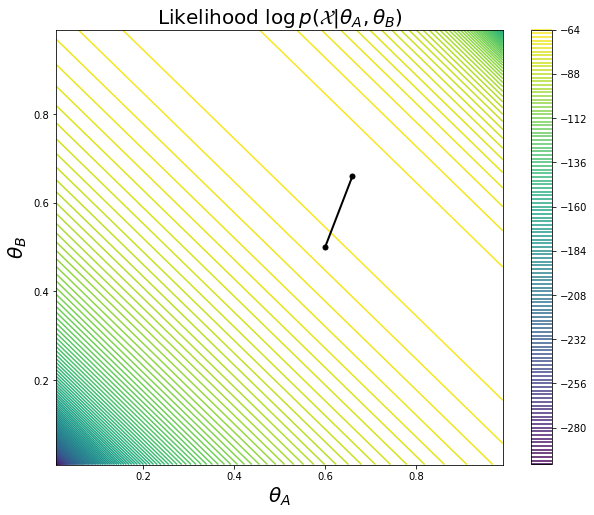

In [27]:
plot_coin_likelihood(coin_a_result, thetas)

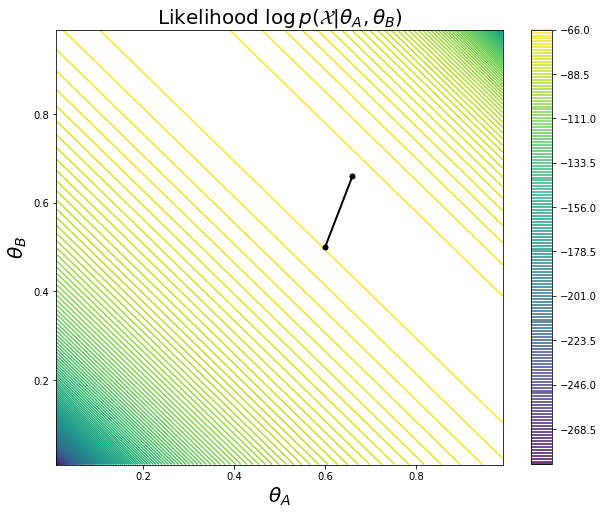

In [28]:
plot_coin_likelihood(coin_b_result, thetas)

In [29]:
# Trying on given data set by prof.
heads = [14, 33, 19, 10, 0, 17, 24, 17, 1, 36, 5, 6, 5, 13, 4, 35, 5, 5, 74, 34]
throws = [41, 43, 23, 23, 1, 23, 36, 37, 2, 131, 5, 29, 13, 47, 10, 58, 15, 14, 100, 113]
new_heads = []
for head in heads:
    idx_head = heads.index(head)
    temp_list = ['H'] * head + ['T'] * (throws[idx_head] - head)
    new_heads.append(temp_list)
    temp_list = []
print(new_heads)

[['H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T'], ['H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T'], ['H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'T', 'T', 'T', 'T'], ['H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T'], ['T'], ['H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'T', 'T', 'T', 'T', 'T', 'T'], ['H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T'], ['H', 'H', 'H', 'H', 'H', 'H', 'H',

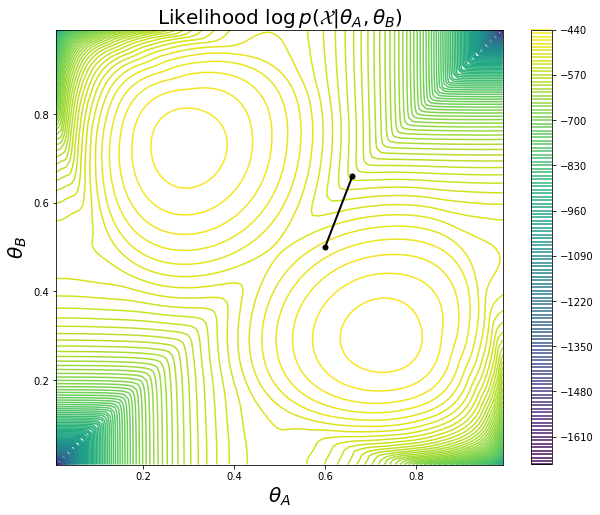

In [30]:
plot_coin_likelihood(new_heads, thetas)